# NON LINEAR REGRESSION

## Objective:  

-  model a sigmoid function for the data
##  $1\over1+\exp^(\beta_1*(x-\beta_2))$

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


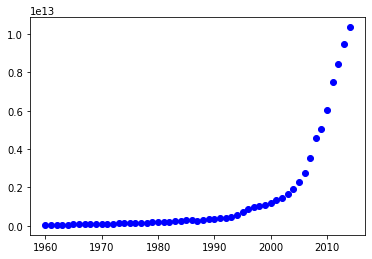

In [7]:
#Analyzing the data
plt.scatter(df.Year, df.Value, color='blue')

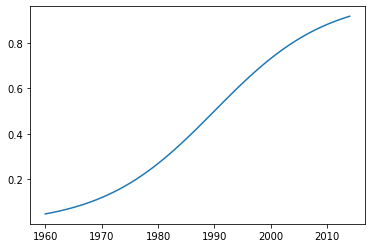

In [18]:
#defining a sigmoid function
def sigmoid(X,beta1,beta2):
    y = 1/(1+np.exp(-beta1*(X - beta2)))
    return y

#assusme some value of beta1,2 and plot the function to analyze
beta1=0.10
beta2=1990

Y_pred = sigmoid(df.Year,beta1,beta2)
plt.plot(df.Year,Y_pred)


In [22]:
#Feature scaling
x_data = df.Year/df.Year.max()
y_data = df.Value/df.Value.max()

### How we find the best parameters of our fit line  
we can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data

In [27]:
from scipy.optimize import curve_fit

#optimized parameter
popt, pcov = curve_fit(sigmoid,x_data,y_data)
print('beta_1 : %f \nbeta_2 : %f' %(popt[0], popt[1]))


beta_1 : 690.451711 
beta_2 : 0.997207


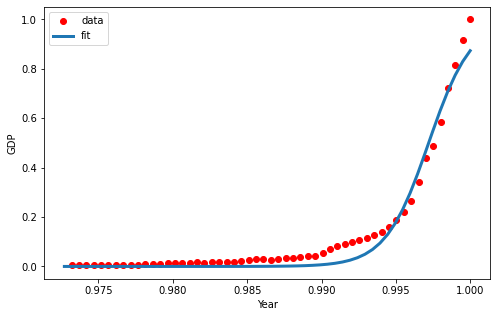

In [29]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()